# Classification - Decision Tree - Education_Attainment

Now we try a Decision Tree Classifier from sklearn on the same Internat Usage Education Attainment data. The same interface is used as the k-nearest-networks classifier.

Again, we separate the data into training and test data.

In [10]:
# Import feature subset with Education_Attainment Column and one hot encoded values

from sklearn import neighbors, datasets
import pandas as pd
import pylab as pl
import numpy as np
from matplotlib.colors import ListedColormap
import itertools
import re, string
import sys
sys.path.append('../resources')
from w6support import plot_2d_class
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

originalDF = pd.read_csv('educationFeatureSubset.csv')
dfOHE = pd.read_csv('oheTransformedData.csv')
dfOHE['Education_Attainment'] = pd.Series(originalDF['Education_Attainment'], index=dfOHE.index)
dfOHE.fillna(0, inplace=True)

# Next we check the Education_Attainment options in the dataset for use with classification
print(dfOHE.Education_Attainment.unique())

# Now we replace those values with integers for use with the classification algorithm
education_values = {"Education_Attainment": {"Masters": 1, "Some_College": 2, "College": 3, "High_School": 4, "Professional": 5, "Grammar": 6, "Special": 7, "Doctoral": 8, "Other": 9}}
dfOHE.replace(education_values, inplace=True)

X, y = dfOHE.loc[:, dfOHE.columns != 'Education_Attainment'], dfOHE['Education_Attainment']

predNames = list(dfOHE.columns[dfOHE.columns != 'Education_Attainment'])

['Masters' 'Some_College' 'College' 'High_School' 'Professional' 'Grammar'
 'Special' 'Doctoral' 'Other']


In [11]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, stratify=y)

from sklearn.tree import DecisionTreeClassifier

# Derive Xtrain2, which is the 
XtrainDf = pd.DataFrame(data=Xtrain, columns=predNames)
c1 = 'Age'
c2 = 'Not_Purchasing_Prefer_people'
colNames = [c1, c2]
Xtrain2 = XtrainDf[colNames]
nTrain = Xtrain2.shape[0]

XtestDf = pd.DataFrame(data=Xtest, columns=predNames)
Xtest2 = XtestDf[colNames]
Xcombined2 = pd.concat([Xtrain2, Xtest2])
ycombined = np.hstack((ytrain, ytest))


We also look at comparing different decision trees to the `Age` $\times$ `Not_Purchasing_Prefer_people` data, based on the following conditions

1. maximum tree depth (2,3,4,5)
2. choice of tree impurity algorithm (`gini` or `entropy`)

which is 8 combinations in all.

Plotting pic/depth_2_gini_decisionTree_Occupation_Age_NotPurchasingPreferPeople.pdf
0.3560830860534125
[[  0 224  57   0   0   0   0   0   0]
 [  0 508 138  12   0   0   0   0   0]
 [  0 375 186   3   0   0   0   0   0]
 [  0 188  35  26   0   0   0   0   0]
 [  0  44  10   0   0   0   0   0   0]
 [  0  10   0  30   0   0   0   0   0]
 [  0  74  14   4   0   0   0   0   0]
 [  0  48   3   0   0   0   0   0   0]
 [  0  17   7   9   0   0   0   0   0]]
              precision    recall  f1-score   support

           1      0.000     0.000     0.000       281
           2      0.341     0.772     0.473       658
           3      0.413     0.330     0.367       564
           4      0.310     0.104     0.156       249
           5      0.000     0.000     0.000        54
           6      0.000     0.000     0.000        40
           7      0.000     0.000     0.000        92
           8      0.000     0.000     0.000        51
           9      0.000     0.000     0.000        33

   

/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.35014836795252224
[[  0   1 280   0   0   0   0   0   0]
 [  0 130 516  12   0   0   0   0   0]
 [  0   9 552   3   0   0   0   0   0]
 [  0  58 165  26   0   0   0   0   0]
 [  0   0  54   0   0   0   0   0   0]
 [  0   2   8  30   0   0   0   0   0]
 [  0   4  84   4   0   0   0   0   0]
 [  0   1  50   0   0   0   0   0   0]
 [  0   2  22   9   0   0   0   0   0]]
              precision    recall  f1-score   support

           1      0.000     0.000     0.000       281
           2      0.628     0.198     0.301       658
           3      0.319     0.979     0.481       564
           4      0.310     0.104     0.156       249
           5      0.000     0.000     0.000        54
           6      0.000     0.000     0.000        40
           7      0.000     0.000     0.000        92
           8      0.000     0.000     0.000        51
           9      0.000     0.000     0.000        33

   micro avg      0.350     0.350     0.350      2022
   macro avg      0.140     0.14

/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.3664688427299703
[[  0 111 170   0   0   0   0   0   0]
 [  0 321 331   6   0   0   0   0   0]
 [  0 168 396   0   0   0   0   0   0]
 [  0 124 101  24   0   0   0   0   0]
 [  0  24  30   0   0   0   0   0   0]
 [  0   6   4  30   0   0   0   0   0]
 [  0  32  59   1   0   0   0   0   0]
 [  0  34  17   0   0   0   0   0   0]
 [  0  12  12   9   0   0   0   0   0]]
              precision    recall  f1-score   support

           1      0.000     0.000     0.000       281
           2      0.386     0.488     0.431       658
           3      0.354     0.702     0.470       564
           4      0.343     0.096     0.150       249
           5      0.000     0.000     0.000        54
           6      0.000     0.000     0.000        40
           7      0.000     0.000     0.000        92
           8      0.000     0.000     0.000        51
           9      0.000     0.000     0.000        33

   micro avg      0.366     0.366     0.366      2022
   macro avg      0.120     0.143

/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.36350148367952523
[[  0 214  67   0   0   0   0   0   0]
 [  0 526 126   6   0   0   0   0   0]
 [  0 379 185   0   0   0   0   0   0]
 [  0 194  31  24   0   0   0   0   0]
 [  0  43  11   0   0   0   0   0   0]
 [  0  10   0  30   0   0   0   0   0]
 [  0  75  16   1   0   0   0   0   0]
 [  0  46   5   0   0   0   0   0   0]
 [  0  19   5   9   0   0   0   0   0]]
              precision    recall  f1-score   support

           1      0.000     0.000     0.000       281
           2      0.349     0.799     0.486       658
           3      0.415     0.328     0.366       564
           4      0.343     0.096     0.150       249
           5      0.000     0.000     0.000        54
           6      0.000     0.000     0.000        40
           7      0.000     0.000     0.000        92
           8      0.000     0.000     0.000        51
           9      0.000     0.000     0.000        33

   micro avg      0.364     0.364     0.364      2022
   macro avg      0.123     0.13

/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.37388724035608306
[[  0 107 174   0   0   0   0   0   0]
 [  0 313 339   6   0   0   0   0   0]
 [  0 161 403   0   0   0   0   0   0]
 [  0 122 103  13   0  11   0   0   0]
 [  0  23  31   0   0   0   0   0   0]
 [  0   6   4   3   0  27   0   0   0]
 [  0  30  61   0   0   1   0   0   0]
 [  0  32  19   0   0   0   0   0   0]
 [  0  11  13   2   0   7   0   0   0]]
              precision    recall  f1-score   support

           1      0.000     0.000     0.000       281
           2      0.389     0.476     0.428       658
           3      0.351     0.715     0.471       564
           4      0.542     0.052     0.095       249
           5      0.000     0.000     0.000        54
           6      0.587     0.675     0.628        40
           7      0.000     0.000     0.000        92
           8      0.000     0.000     0.000        51
           9      0.000     0.000     0.000        33

   micro avg      0.374     0.374     0.374      2022
   macro avg      0.208     0.21

/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.3714144411473788
[[  0 214  67   0   0   0   0   0   0]
 [  0 526 126   6   0   0   0   0   0]
 [  0 379 185   0   0   0   0   0   0]
 [  0 194  31  13   0  11   0   0   0]
 [  0  43  11   0   0   0   0   0   0]
 [  0  10   0   3   0  27   0   0   0]
 [  0  75  16   0   0   1   0   0   0]
 [  0  46   5   0   0   0   0   0   0]
 [  0  19   5   2   0   7   0   0   0]]
              precision    recall  f1-score   support

           1      0.000     0.000     0.000       281
           2      0.349     0.799     0.486       658
           3      0.415     0.328     0.366       564
           4      0.542     0.052     0.095       249
           5      0.000     0.000     0.000        54
           6      0.587     0.675     0.628        40
           7      0.000     0.000     0.000        92
           8      0.000     0.000     0.000        51
           9      0.000     0.000     0.000        33

   micro avg      0.371     0.371     0.371      2022
   macro avg      0.210     0.206

/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.36993076162215627
[[  0 133 148   0   0   0   0   0   0]
 [  0 370 282   6   0   0   0   0   0]
 [  0 226 338   0   0   0   0   0   0]
 [  0 149  76  13   0  11   0   0   0]
 [  0  29  25   0   0   0   0   0   0]
 [  0   8   2   3   0  27   0   0   0]
 [  0  46  45   0   0   1   0   0   0]
 [  0  35  16   0   0   0   0   0   0]
 [  0  15   9   2   0   7   0   0   0]]
              precision    recall  f1-score   support

           1      0.000     0.000     0.000       281
           2      0.366     0.562     0.443       658
           3      0.359     0.599     0.449       564
           4      0.542     0.052     0.095       249
           5      0.000     0.000     0.000        54
           6      0.587     0.675     0.628        40
           7      0.000     0.000     0.000        92
           8      0.000     0.000     0.000        51
           9      0.000     0.000     0.000        33

   micro avg      0.370     0.370     0.370      2022
   macro avg      0.206     0.21

/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.38328387734915925
[[  0 147 134   0   0   0   0   0   0]
 [  0 420 232   6   0   0   0   0   0]
 [  0 249 315   0   0   0   0   0   0]
 [  0 156  69  13   0  11   0   0   0]
 [  0  36  18   0   0   0   0   0   0]
 [  0   7   3   3   0  27   0   0   0]
 [  0  45  46   0   0   1   0   0   0]
 [  0  42   9   0   0   0   0   0   0]
 [  0  15   9   2   0   7   0   0   0]]
              precision    recall  f1-score   support

           1      0.000     0.000     0.000       281
           2      0.376     0.638     0.473       658
           3      0.377     0.559     0.450       564
           4      0.542     0.052     0.095       249
           5      0.000     0.000     0.000        54
           6      0.587     0.675     0.628        40
           7      0.000     0.000     0.000        92
           8      0.000     0.000     0.000        51
           9      0.000     0.000     0.000        33

   micro avg      0.383     0.383     0.383      2022
   macro avg      0.209     0.21

/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


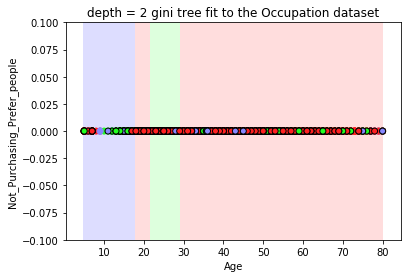

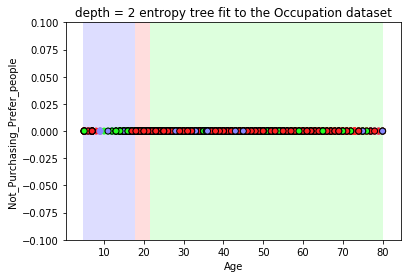

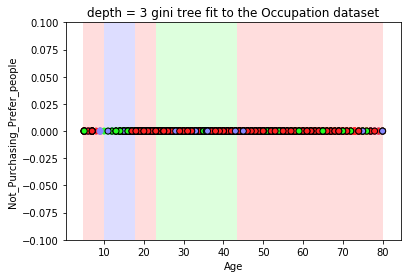

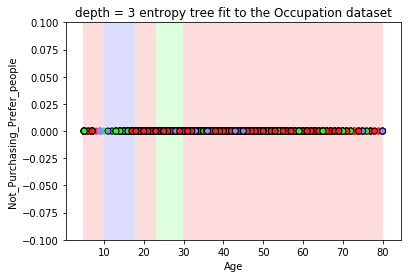

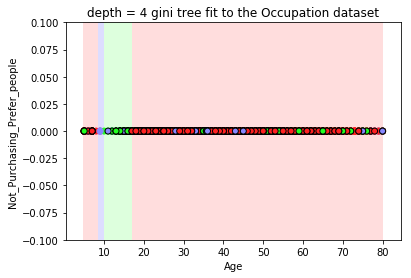

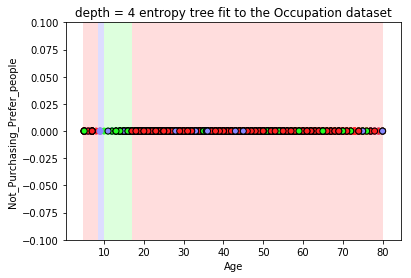

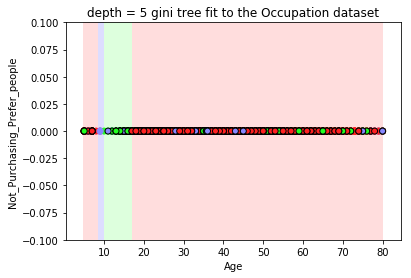

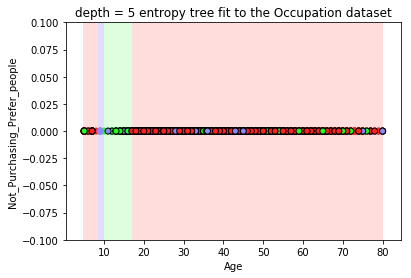

In [12]:
# Create color maps for 3-class classification problem
cmap_light = ListedColormap(['#FFDDDD', '#DDFFDD', '#DDDDFF'])
cmap_bold = ListedColormap(['#FF2222', '#22FF22', '#8888FF'])

pattern = re.compile('[\W_]+', re.UNICODE)

c1 = pattern.sub("",c1.title()) # Make titlecase, then remove non-alphanumeric characters
c2 = pattern.sub("",c2.title())

for treeDepth in range(2,6):
  for criterion in ["gini","entropy"]:
    tree = DecisionTreeClassifier(criterion=criterion, max_depth=treeDepth, random_state=0)
    tree2 = DecisionTreeClassifier(criterion=criterion, max_depth=treeDepth, random_state=0)

    tree2.fit(Xtrain2, ytrain)

    plotTitle = "depth = %i %s %s fit to the %s dataset" % (treeDepth, criterion, "tree", "Occupation")
    fileTitle = "pic/depth_%i_%s_%s_%s_%s_%s.pdf" % (treeDepth, criterion, "decisionTree", "Occupation", c1, c2)

    print("Plotting "+fileTitle)
    plot_2d_class(Xcombined2, ycombined, nTrain, tree2, plotTitle, fileTitle, cmap_light, cmap_bold)

    ytree2 = tree2.predict(Xtest2)
    print(accuracy_score(ytest, ytree2))
    print(confusion_matrix(ytest, ytree2))
    print(classification_report(ytest, ytree2, digits=3))

We include all features below

In [13]:
criterion = "entropy"
treeDepth = 8
tree = DecisionTreeClassifier(criterion=criterion, max_depth=treeDepth, random_state=0)
tree.fit(Xtrain, ytrain)
y_treeTest = tree.predict(Xtest)
print(accuracy_score(ytest, y_treeTest))
print(confusion_matrix(ytest, y_treeTest))
print(classification_report(ytest, y_treeTest, digits=3))

0.39416419386745793
[[ 30  84 165   2   0   0   0   0   0]
 [ 24 398 220  13   0   1   0   2   0]
 [ 35 203 319   6   0   0   1   0   0]
 [  3 165  42  30   0   9   0   0   0]
 [  2  22  30   0   0   0   0   0   0]
 [  0   9   1  10   0  20   0   0   0]
 [  5  58  25   4   0   0   0   0   0]
 [ 10  22  19   0   0   0   0   0   0]
 [  2  15   7   5   0   4   0   0   0]]
              precision    recall  f1-score   support

           1      0.270     0.107     0.153       281
           2      0.408     0.605     0.487       658
           3      0.385     0.566     0.458       564
           4      0.429     0.120     0.188       249
           5      0.000     0.000     0.000        54
           6      0.588     0.500     0.541        40
           7      0.000     0.000     0.000        92
           8      0.000     0.000     0.000        51
           9      0.000     0.000     0.000        33

   micro avg      0.394     0.394     0.394      2022
   macro avg      0.231     0.21

/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


One of the main advantages of decision trees is the fact that they provide easily interpreted models for prediction. Indeed, the rules encoded in the tree can help to understand how the predictors combine and contribute to explaining the classification. As such, decision trees are often described as _white box_, where other algorithms (in particular, neural networks) are best seen as _black box_.

To aid interpretation, `scikit-learn` can output the model in a graph description language such as [dot](https://www.graphviz.org/pdf/dotguide.pdf) using the `export_graphviz` method. If you wish, you can export the `dot` file and process it using tools, both command line such as [dotty](https://www.graphviz.org/pdf/dottyguide.pdf) and more general tools such as those listed [here](https://en.wikipedia.org/wiki/Graphviz). However, it is probably more convenient to use a `dot` postprocessor (`pydotplus`) directly from within the notebook to create an object that can be displayed in the notebook, or saved to a file as below.

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.761687 to fit



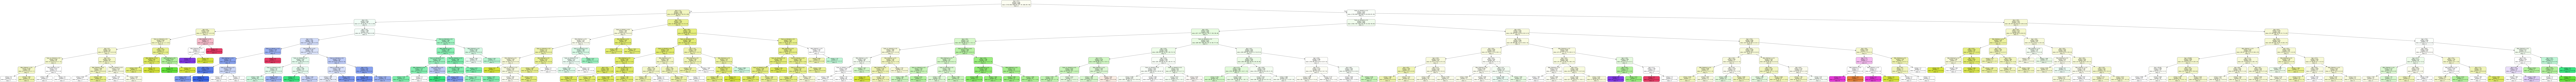

True

In [14]:
from IPython.display import Image
from IPython.display import display
import pydotplus
from sklearn.tree import export_graphviz
        
dot_data = export_graphviz(
    tree, 
    out_file=None,
    feature_names=predNames,  
    # the parameters below are new in sklearn 0.18
    class_names=['1', '2', '3', '4', '5', '6', '7', '8', '9'],  
    filled=True,
    rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data)
display(Image(graph.create_png()))
graph.write_pdf("pic/tree.pdf")
